# Making the Most of your Marketing
Workings for essence interview 25th March 2020

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import statsmodels as sts
import datetime
from palettable.colorbrewer.qualitative import Pastel1_7, Dark2_6

In [197]:
print(Dark2_6.hex_colors)

['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02']


In [3]:
#check workind directory
import os
os.getcwd()

'C:\\Users\\lundr\\esscence'

Read in xlsx file

In [4]:
data = pd.read_excel('mobile_data.xlsx')

Check columns and data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Week                        52 non-null     datetime64[ns]
 1   Sales                       52 non-null     int64         
 2   TV Impacts                  52 non-null     int64         
 3   TV Spend                    52 non-null     int64         
 4   TV contribution             52 non-null     int64         
 5   Press Impacts               52 non-null     int64         
 6   Press Spend                 52 non-null     int64         
 7   Press contribution          52 non-null     int64         
 8   Digial Impacts              52 non-null     int64         
 9   Digital Spend               52 non-null     int64         
 10  Digital contribution        52 non-null     int64         
 11  Pay per click Impacts       52 non-null     int64         
 

In [6]:
data.describe()

,Sales,TV Impacts,TV Spend,TV contribution,Press Impacts,Press Spend,Press contribution,Digial Impacts,Digital Spend,Digital contribution,Pay per click Impacts,Pay per click Spend,Pay per click contribution,Radio Impacts,Radio Spend,Radio contribution,Base
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000
mean,5514.423077,63.288462,42000.673077,370.384615,16.442308,16666.846154,488.269231,8.172265e+06,19789.326923,216.634615,120048.711538,24114.038462,205.480769,4.349470e+07,45719.461538,334.769231,3899.038462
std,1440.057983,39.606068,29472.665965,125.279320,23.068027,21856.245578,306.031276,2.107543e+06,5817.690748,56.945805,48780.127808,12453.067693,60.829073,2.358808e+07,25182.187534,149.994982,1158.591470
min,2838.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,2.856837e+06,3750.000000,95.000000,38536.000000,9287.000000,68.000000,0.000000e+00,0.000000,4.000000,1780.000000
25%,4231.750000,37.500000,12101.500000,305.250000,0.000000,0.000000,267.250000,7.015802e+06,16124.500000,178.500000,101348.750000,16394.750000,156.250000,3.343931e+07,36473.750000,279.000000,2938.750000
50%,5667.500000,58.500000,52230.500000,405.500000,11.000000,11916.000000,458.000000,8.401954e+06,19119.000000,205.500000,114883.000000,20874.500000,209.000000,4.882370e+07,52485.500000,373.000000,3966.500000
75%,6698.500000,94.250000,64372.000000,455.000000,19.500000,25204.250000,690.500000,9.817833e+06,24181.250000,263.750000,136074.000000,27706.250000,241.750000,6.260403e+07,64421.000000,414.000000,4944.000000
max,8341.000000,160.000000,104531.000000,623.000000,100.000000,108311.000000,1063.000000,1.214523e+07,35632.000000,326.000000,409165.000000,82321.000000,430.000000,7.241055e+07,86372.000000,564.000000,6526.000000


Check contributions add up to sales - base:

In [7]:
data['attr_sales'] = (data['TV contribution'] + 
                    data['Press contribution'] + 
                    data['Digital contribution'] + 
                    data['Pay per click contribution']+ 
                    data['Radio contribution'])

data['sales_check'] =  data['Base'] + data['attr_sales'] - data['Sales']


In [8]:
data['sales_check']

0     0
1     0
2     0
3    -1
4     0
5     0
6     1
7    -1
8     0
9    -1
10    0
11    1
12    0
13   -1
14    0
15    1
16    1
17    1
18    0
19    1
20    0
21    0
22    1
23    0
24    0
25    1
26    0
27    0
28    1
29    0
30    0
31    1
32    1
33    1
34    0
35    1
36    0
37    0
38    0
39   -1
40    0
41    1
42   -1
43    0
44    0
45   -1
46    0
47   -1
48    1
49    1
50    1
51   -1
Name: sales_check, dtype: int64

Minor discrrepancies due to rounding

# Slide 4: Headlines

In [9]:
print('annual sales: ' + str(sum(data['Sales'])))
print('annual marketing contributon: ' + str(sum(data['attr_sales'])))
print('annual marketing share: ' + str(sum(data['attr_sales'])/sum(data['Sales'])*100))
print('minimum share :' +str(min(data['attr_sales']/data['Sales'])))
print('maximum share :' +str(max(data['attr_sales']/data['Sales'])))

annual sales: 286750
annual marketing contributon: 84008
annual marketing share: 29.296599825632086
minimum share :0.16772823779193205
maximum share :0.4229264475743349


# Slide 5: Peaks and troughs in sales

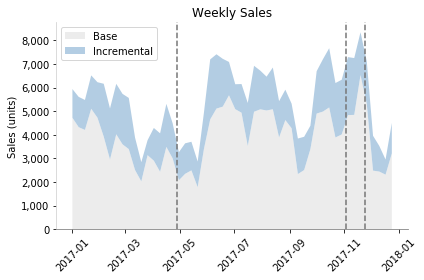

In [10]:
chart_df = data[['Base','attr_sales']]
value = chart_df.values
labels = data['Week']
col = [ '#ECECEC','#B3CDE3']


# plot chsrt
fig, ax = plt.subplots(1)
plt.stackplot(labels,chart_df['Base'],chart_df['attr_sales'], colors = col)
plt.xticks(rotation=45)

# add legend

plt.legend(['Base','Incremental'])

# add titles

plt.ylabel('Sales (units)')
plt.title('Weekly Sales')
#

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#
ax.axvline(pd.to_datetime('2017-11-24'), ls='--',color = '#757575' ) # black friday
#ax.axvline(pd.to_datetime('2017-04-16'), ls='--', color = '#757575')# easter
ax.axvline(pd.to_datetime('2017-04-28'), ls='--',color = '#757575')# samsung s8 launch
ax.axvline(pd.to_datetime('2017-11-03'), ls='--',color = '#757575')# i-phone X release

# REMOVE BORDER
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('lightgrey')
plt.tight_layout()
plt.savefig('sales.png',format='png')

In [11]:
max(data['attr_sales'])

2541

# Slide 6: Incremental sales

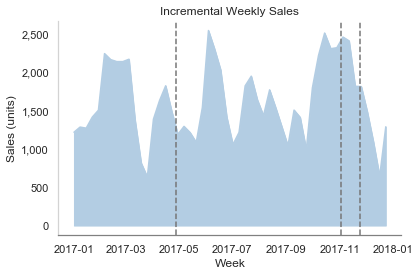

In [12]:

sns.set(style="white", palette="muted", color_codes=True)
ax1 = sns.lineplot(x="Week", y="attr_sales", data=data, color= '#B3CDE3')
ax1.fill_between(data['Week'],data['attr_sales'], color='#B3CDE3')
# add titles

plt.ylabel('Sales (units)')
plt.title('Incremental Weekly Sales')
#

ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])

#
ax1.axvline(pd.to_datetime('2017-11-24'), ls='--',color = '#757575' ) # black friday
#ax.axvline(pd.to_datetime('2017-04-16'), ls='--', color = '#757575')# easter
ax1.axvline(pd.to_datetime('2017-04-28'), ls='--',color = '#757575')# samsung s8 launch
ax1.axvline(pd.to_datetime('2017-11-03'), ls='--',color = '#757575')# i-phone X release

# REMOVE BORDER
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color('grey')
ax1.spines['left'].set_color('lightgrey')
plt.tight_layout()
plt.savefig('incremental sales.png',format='png')

# Slide 7: Sales and Spending

In [16]:
# define total spend
data['total_spend'] = data.filter(regex='Spend', axis=1).iloc[:,0:5].sum(axis=1)

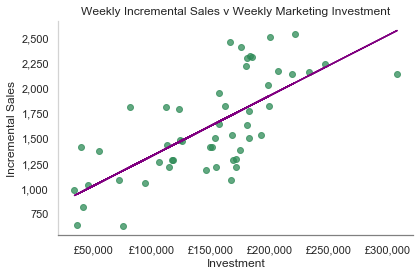

In [18]:
# plot spend against incremental sales
col = sns.color_palette("Set2", 11)
x = data['total_spend']
y = data['attr_sales']

fig1 = plt.figure(1)
#fig1.set_figheight(10)
#fig1.set_figwidth(10)
ax = fig1.add_subplot(1,1,1)
ax.scatter(x,y,color = 'seagreen', alpha = 0.75)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"purple")
plt.xlabel('Investment')
plt.ylabel('Incremental Sales')
plt.title('Weekly Incremental Sales v Weekly Marketing Investment')


ax.set_xticklabels(['£{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

# REMOVE BORDER
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('lightgrey')
plt.tight_layout()
plt.savefig('sales-spending.png',format='png')

# Quick Query : Differences by quarter/month? 
Not much to say here....

In [220]:
data['quarter'] = data['Week'].map(lambda x : x.quarter)

In [221]:
quarter = data.groupby(by = 'quarter').sum()

In [222]:
quarter['marketing_share'] = quarter['attr_sales']/quarter['Sales']

In [223]:
# Monthly aggregates

In [224]:
data['month'] = data['Week'].map(lambda x : x.month)
month = data.groupby(by = 'month').sum()
month['marketing_share'] = month['attr_sales']/month['Sales']

In [225]:
month[['Sales','marketing_share']]

,Sales,marketing_share
month,,
1,29753,0.224650
2,23160,0.374525
3,16045,0.310689
4,21403,0.350932
5,15140,0.338441
6,28897,0.286535
7,31266,0.245410
8,24634,0.244459
9,17450,0.283095


# Slide 8: Marketing Drivers

In [233]:
# create aggregates across the year

# contribtion
cont = pd.concat([data.filter(regex='contribution', axis=1).iloc[:,0:5],data[['Base','Sales']]], axis=1)

#aggregate the contirbution
cont_agg = pd.DataFrame(cont.sum())
cont_agg.columns = ['contribution']
sales = float(cont_agg.loc['Sales'])
cont_agg['percent'] = cont_agg['contribution']/sales*100


In [235]:
# check percentages add up to 100%
sum(cont_agg['percent'][0:6])

100.00278988666085

In [236]:
cont_agg2 = cont_agg.iloc[0:6,:].sort_values(by='percent',ascending=True)

In [237]:
cont_agg2

,contribution,percent
Pay per click contribution,10685,3.726242
Digital contribution,11265,3.928509
Radio contribution,17408,6.070793
TV contribution,19260,6.716652
Press contribution,25390,8.854403
Base,202750,70.706190


In [238]:
# define colours
press_col = '#FBB4AE'
radio_col = '#B3CDE3'
tv_col = '#CCEBC5'
digital_col = '#DECBE4'
ppc_col = '#FED9A6'
base_col = '#C0C0C0'

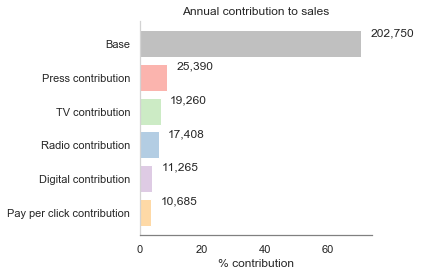

In [239]:
# plot Base and incremental spend

colors = [ppc_col, digital_col,radio_col,tv_col,press_col,base_col]

fig, ax = plt.subplots(1)
p = plt.barh(cont_agg2.index,cont_agg2['percent'], color=colors)

plt.xlabel('% contribution')
plt.title('Annual contribution to sales')
#

for i, v in enumerate(cont_agg2['percent']):
    ax.text(v + 3, i + .25, str('{:,}'.format(cont_agg2['contribution'][i])))


# REMOVE BORDER
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('lightgrey')
plt.tight_layout()
plt.savefig('contributions.png',format='png')



# Slide 9: Donuts of spend and investment

In [35]:
# create aggregates of spend
spend = pd.DataFrame(data.filter(regex='Spend', axis=1))
spend_total = spend.sum()[0:5]

In [36]:
spend_total = spend_total.sort_index()


In [37]:
cont_agg3 = cont_agg2.sort_index()[1:6]

In [38]:
sp_cot=pd.concat([pd.DataFrame(cont_agg3['contribution'].values),pd.DataFrame(spend_total.values)], axis = 1)
sp_cot.index = [x.split('Sp',1)[0] for x in spend_total.index]
sp_cot.columns = ['Contribution','Spend']
sp_cot.loc['Total','Contribution'] = sp_cot['Contribution'][0:5].sum()
sp_cot.loc['Total','Spend'] = sp_cot['Spend'][0:5].sum()
sp_cot['per_cent_contribution'] = sp_cot['Contribution']/sp_cot.loc['Total','Contribution']*100
sp_cot['per_cent_spend'] = sp_cot['Spend']/sp_cot.loc['Total','Spend']*100
sp_cot = sp_cot.sort_values(by='Spend', ascending = True)

In [39]:
sp_cot

,Contribution,Spend,per_cent_contribution,per_cent_spend
Press,25390.0,866676.0,30.223312,11.239333
Digital,11265.0,1029045.0,13.409437,13.344987
Pay per click,10685.0,1253930.0,12.719027,16.261368
TV,19260.0,2184035.0,22.926388,28.323269
Radio,17408.0,2377412.0,20.721836,30.831044
Total,84008.0,7711098.0,100.000000,100.000000


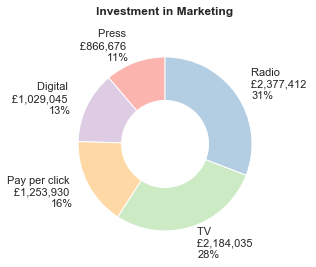

<Figure size 432x288 with 0 Axes>

In [41]:
# plot spend breakdown
colors = [press_col,digital_col,ppc_col,tv_col,radio_col]
# donut plots
names=sp_cot[0:5].index
size=sp_cot['Spend'][0:5]
 
labels = ['{}\n£{:,} \n{:0.0f}%'.format(x,int(sp_cot.loc[x,'Spend']),sp_cot.loc[x,'per_cent_spend']) for x in names]
    
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')



plt.pie(size, labels=labels, colors=colors, labeldistance=1.2, startangle=90)
plt.title('Investment in Marketing',pad=20, loc = 'center',fontweight='bold')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
plt.tight_layout()
p.savefig('investment pie.png',format='png')


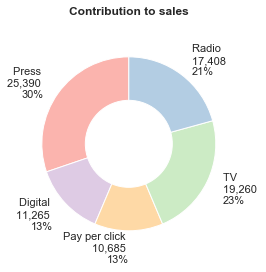

<Figure size 432x288 with 0 Axes>

In [42]:
names=sp_cot[0:5].index
size=sp_cot['Contribution'][0:5]
 
labels = ['{}\n{:,} \n{:0.0f}%'.format(x,int(sp_cot.loc[x,'Contribution']),sp_cot.loc[x,'per_cent_contribution']) for x in names]
    
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')

plt.pie(size, labels=labels, colors=colors, labeldistance=1.2, startangle=90)
plt.title('Contribution to sales',pad=20, loc = 'center',fontweight='bold')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
plt.tight_layout()
p.savefig('contribution pie.png',format='png')

Calculate total spend

In [43]:
data['total_spend'] = (data['TV Spend'] + 
                    data['Press Spend'] + 
                    data['Digital Spend'] + 
                    data['Pay per click Spend']+ 
                    data['Radio Spend'])



# Slide 10: Return on Investment

In [44]:
# Calculate ROI by channel by week
data['TV_ROI'] = 1/(data['TV contribution']/data['TV Spend'])
data['Press_ROI'] = 1/(data['Press contribution']/data['Press Spend'])
data['Digital_ROI'] = 1/(data['Digital contribution']/data['Digital Spend'])
data['Pay_per_click_ROI'] = 1/(data['Pay per click contribution']/data['Pay per click Spend'])
data['Radio_ROI'] = 1/(data['Radio contribution']/data['Radio Spend'])
data['Total_ROI'] = 1/(data['attr_sales']/data['total_spend'])



In [46]:
#Calculate ROI by channel annually and place in a dataframe
TV_ROI = 1/(sum(data['TV contribution'])/sum(data['TV Spend']))
Press_ROI = 1/(sum(data['Press contribution'])/sum(data['Press Spend']))
Digital_ROI = 1/(sum(data['Digital contribution'])/sum(data['Digital Spend']))
Pay_per_click_ROI = 1/(sum(data['Pay per click contribution'])/sum(data['Pay per click Spend']))
Radio_ROI = 1/(sum(data['Radio contribution'])/sum(data['Radio Spend']))
Total_ROI = 1/(sum(data['attr_sales'])/sum(data['total_spend']))
ROI = [TV_ROI, Press_ROI,Digital_ROI,Pay_per_click_ROI,Radio_ROI,Total_ROI]
ROI_Labels = ['TV', 'Press','Digital', 'Pay per click', 'Radio','Total']
df_ROI =pd.DataFrame(ROI, index = ROI_Labels)

In [47]:
df_ROI.columns = ['ROI']

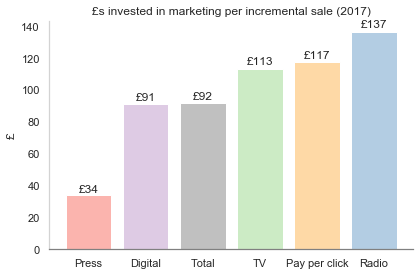

In [48]:
def autolabel(rects, labels):
    labs = ['£{:0.0f}'.format(x) for x in labels]
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                labs[idx],
                ha='center', va='bottom', rotation=0)

colors = [press_col,digital_col,'#C0C0C0',tv_col, ppc_col,radio_col]
df_ROI.sort_values(by = 'ROI', inplace = True)
#fig = plt.figure()
fig, ax = plt.subplots(1)
p = ax.bar(df_ROI.index,df_ROI['ROI'], color = colors )
plt.ylabel('£')
plt.title('£s invested in marketing per incremental sale (2017)')
autolabel(p, df_ROI['ROI'])
          
# REMOVE BORDER
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('lightgrey')
plt.tight_layout()
plt.savefig('ROI.png',format='png')

plt.show()

# Slide 11: Rolling averages of returns

In [49]:
#Create 4-week rolling averages
four_roll = pd.concat([data.filter(regex='contribution', axis=1).iloc[:,0:5],data['attr_sales'],data.filter(regex='Spend', axis=1).iloc[:,0:5],data['total_spend']], axis=1).rolling(window=4).sum()
four_roll.set_index(data['Week'], inplace=True)


In [50]:
four_roll['TV'] = four_roll['TV Spend']/four_roll['TV contribution']
four_roll['Digital'] = four_roll['Digital Spend']/four_roll['Digital contribution']
four_roll['Pay per click'] = four_roll['Pay per click Spend']/four_roll['Pay per click contribution']
four_roll['Press'] = four_roll['Press Spend']/four_roll['Press contribution']
four_roll['Radio'] = four_roll['Radio Spend']/four_roll['Radio contribution']
four_roll['Total'] = four_roll['total_spend']/four_roll['attr_sales']

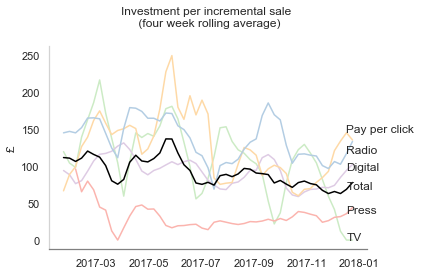

In [51]:
dta = four_roll[['TV','Digital','Pay per click','Press','Radio','Total']]
labels = dta.columns
fig, ax = plt.subplots(1)
colors = [tv_col,digital_col,ppc_col,press_col,radio_col,'#000000']

for i in range(6):
    ax.plot(dta[labels[i]], color=colors[i], label=labels[i])
#ax.legend([x for x in dta.columns],loc = 2 )

# REMOVE BORDER
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('lightgrey')

for i in range(6):
    plt.text(dta[labels[i]].index[-2], dta[labels[i]][-2], labels[i])

plt.title('Investment per incremental sale \n (four week rolling average)',pad=20, loc = 'center')
plt.ylabel('£')
plt.tight_layout()
plt.savefig('ROI over time .png',format='png')


# Slide 12: returns against spend

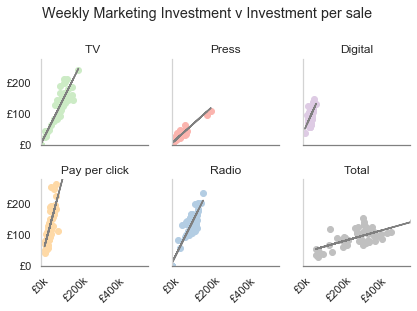

In [53]:
fig, axs = plt.subplots(2,3, sharex=True, sharey=True)

fig.subplots_adjust(hspace = .3, wspace=.2)

#plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

ys =['TV_ROI', 'Press_ROI','Digital_ROI','Pay_per_click_ROI','Radio_ROI','Total_ROI']
xs = ['TV Spend', 'Press Spend','Digital Spend','Pay per click Spend','Radio Spend','total_spend']
colors = [tv_col,press_col,digital_col,ppc_col,radio_col,'#C0C0C0']


axs = axs.ravel()

for x in range(6):
    axs[x].set_xlim(0, 300)
    axs[x].set_ylim(0, 280)

for i in range(6):
    x = data[xs[i]]/1000
    y = data[ys[i]]
    axs[i].scatter(x,y,color=colors[i])
    axs[i].set_xticklabels(['£{:,}k'.format(int(x)) for x in axs[i].get_xticks().tolist()], rotation = 45)
    axs[i].set_yticklabels(['£{:}'.format(int(x)) for x in axs[i].get_yticks().tolist()])
    idx = np.isfinite(x) & np.isfinite(y)
    z = np.polyfit(x[idx],y[idx], 1)
    p = np.poly1d(z)
    axs[i].plot(x,p(x),"grey")


    
for x in range(6):
    axs[x].spines['top'].set_visible(False)
    axs[x].spines['right'].set_visible(False)
    axs[x].spines['bottom'].set_color('grey')
    axs[x].spines['left'].set_color('lightgrey')

titles = ['TV ', 'Press','Digital','Pay per click','Radio','Total']
fig.suptitle('Weekly Marketing Investment v Investment per sale ', y=1.08)
#fig.text(0.5,0.01, "Weekly Marketing Invesment", ha="center", va="center")
#fig.text(0.01,0.5, "Investment per incremental sale", ha="right", va="center", rotation=90)

for x in range(6):
    axs[x].title.set_text(titles[x])

plt.tight_layout(pad=1.2)
fig.savefig('Returns investment.png',format='png')

# Slide 13:Contribution and Investment

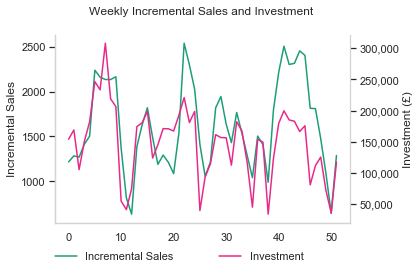

In [241]:
#Contribution press contribution, total spend total ROI
dta = data[['attr_sales','total_spend']]
labels = dta.columns
fig, ax = plt.subplots(1)
colors = ['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02']

ax.plot(dta[labels[0]], color=colors[0], label=labels[0])
plt.ylabel('Incremental Sales')
#ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax2 = ax.twinx()
ax2.plot(dta[labels[1]], color=colors[3], label=labels[1])
#ax2.plot(dta[labels[2]], color=colors[2], label=labels[2])
ax.legend(['Incremental Sales'],loc='upper center', bbox_to_anchor=(0.2, -0.1), ncol=2,frameon=False )
ax2.legend(['Investment'],loc='upper center', bbox_to_anchor=(0.7, -0.1), ncol=2,frameon=False)


ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),&nbsp; ncol=2)

# REMOVE BORDER
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')

# REMOVE BORDER
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_color('lightgrey')
ax2.spines['bottom'].set_color('lightgrey')
ax2.spines['left'].set_color('lightgrey')

# for i in range(3):
#     plt.text(dta[labels[i]].index[-2], dta[labels[i]][-2], labels[i])

plt.title('Weekly Incremental Sales and Investment ',pad=20, loc = 'center')
plt.ylabel('Investment (£)')

plt.tight_layout()
#plt.savefig('Sales and Investment .png',format='png')
plt.savefig('press ppc .png',format='png')

# Slide 14: Reallocation of Spend

In [56]:

# first extract intercept and coefficient for each medium
import statsmodels.formula.api as smf
intercept=[]
coefs=[]

ys =['TV_ROI', 'Press_ROI','Digital_ROI','Pay_per_click_ROI','Radio_ROI','Total_ROI']
xs = ['TV Spend', 'Press Spend','Digital Spend','Pay per click Spend','Radio Spend','total_spend']


for i in range(5):
    x = data[xs[i]]
    y = data[ys[i]]
    results = smf.ols('y ~ x', data=data).fit()
    intercept.append(results.params[0])
    coefs.append(results.params[1])


In [58]:
# ROI starts at its intercept value
# algorithm for allocating spend
df = pd.DataFrame(zip(intercept,coefs), index =['TV', 'Press','Digital','Pay per click','Radio'])
df.columns = ['intercept', 'coefs']
df['investment'] = 0
df['ROI'] = df.intercept+df.coefs*df.investment

df = df.sort_values(by='ROI')
df.investment[0] =+1
for x in range(0,150000,1):
    df['ROI'] = df.intercept+df.coefs*df.investment
    df = df.sort_values(by='ROI')
    df.investment[0]+=1

df

C:\Users\lundr\Miniconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\lundr\Miniconda3\envs\dsj\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,intercept,coefs,investment,ROI
Radio,12.593041,0.002311,27619,76.407062
TV,5.595011,0.002317,30567,76.407425
Digital,42.290846,0.002581,13217,76.407567
Pay per click,22.676927,0.004330,12409,76.407612
Press,7.639455,0.001039,66189,76.408085


In [147]:
# Add in Equivalent investment under 2017 spend
df2 = sp_cot[0:5].sort_index()
#pd.concat([df,sp_cot[0:5]],join='left')
df3 = df.sort_index()
df3.index = df2.index
df4=pd.concat([df3,df2], axis = 1)
df4['investment_2017'] = df4.investment.sum()*df4.per_cent_spend/100
df4['ROI_2017'] = df4.intercept+df4.coefs*df4.investment_2017
new_ROI = df4['investment']/df4['ROI']
old_ROI = df4['investment_2017']/df4['ROI_2017']



1868.9640450445725
1963.1665934272987


In [78]:
df4

,intercept,coefs,investment,ROI,Contribution,Spend,per_cent_contribution,per_cent_spend,investment_2017,ROI_2017
Digital,42.290846,0.002581,13217,76.407567,11265.0,1029045.0,13.409437,13.344987,20017.613451,93.961825
Pay per click,22.676927,0.004330,12409,76.407612,10685.0,1253930.0,12.719027,16.261368,24392.214174,128.294654
Press,7.639455,0.001039,66189,76.408085,25390.0,866676.0,30.223312,11.239333,16859.112240,25.155629
Radio,12.593041,0.002311,27619,76.407062,17408.0,2377412.0,20.721836,30.831044,46246.873975,119.450851
TV,5.595011,0.002317,30567,76.407425,19260.0,2184035.0,22.926388,28.323269,42485.186161,104.017446


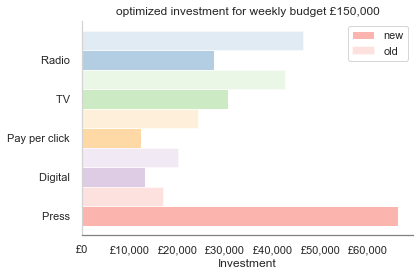

In [133]:
#plot chage in spend

df4 = df4.sort_values(by='investment_2017', ascending = 'False')
labels = df4.index
#colors = [radio_col,tv_col,ppc_col,digital_col,press_col]
colors = [press_col,digital_col,ppc_col,tv_col,radio_col]


ind = np.arange(len(df4))
width = 0.5

fig, ax = plt.subplots()
p1 = plt.barh(ind,df4['investment'],0.5, color=colors)
p2 = plt.barh(ind+width,df4['investment_2017'],0.5, color=colors, alpha = 0.4)
plt.xlabel('Investment')
plt.title('optimized investment for weekly budget £150,000')

plt.legend(['new','old'],loc=0)

ax.set_yticks(ind)
ax.set_yticklabels(labels)
ax.set_xticklabels(['£{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])

# REMOVE BORDER
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('lightgrey')
plt.tight_layout()
plt.savefig('optimal investment.png',format='png')



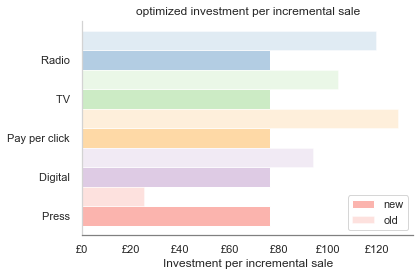

In [134]:
#plot chage in ROI

df4 = df4.sort_values(by='investment_2017', ascending = 'False')
labels = df4.index
#colors = [radio_col,tv_col,ppc_col,digital_col,press_col]
colors = [press_col,digital_col,ppc_col,tv_col,radio_col]


ind = np.arange(len(df4))
width = 0.5

fig, ax = plt.subplots()
p1 = plt.barh(ind,df4['ROI'],0.5, color=colors)
p2 = plt.barh(ind+width,df4['ROI_2017'],0.5, color=colors, alpha = 0.4)
plt.xlabel('Investment per incremental sale')
plt.title('optimized investment per incremental sale')

plt.legend(['new','old'],loc=0)

ax.set_yticks(ind)
ax.set_yticklabels(labels)
ax.set_xticklabels(['£{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])

# REMOVE BORDER
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('lightgrey')
plt.tight_layout()
plt.savefig('optimal ROI.png',format='png')



In [143]:
# average ROI old

old_roi = sum(df4['investment_2017']*df4['ROI_2017'])/sum(df4['investment_2017'])

new = sum(df4['investment'])/df4['ROI'][0]
old = sum(df4['investment_2017'])/old_roi

print(new/old-1)

# Slide 15: Impact and contribution

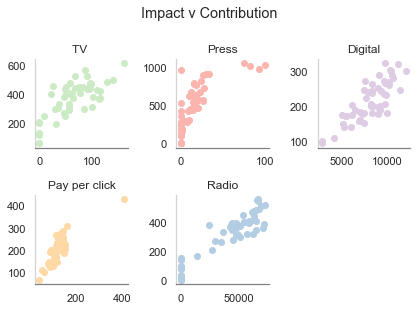

In [171]:
list_1 = ['TV', 'Press','Digital','Pay per click','Radio']
list_2 = ['TV Impacts', 'Press Impacts','Digial Impacts','Pay per click Impacts','Radio Impacts']
list_3 = ['TV contribution', 'Press contribution','Digital contribution','Pay per click contribution','Radio contribution']
list_4 = ['TV Spend', 'Press Spend','Digital Spend','Pay per click Spend','Radio Spend']


fig, axs = plt.subplots(2,3)

fig.subplots_adjust(hspace = .5, wspace=.5)

#plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

ys =list_3
xs = list_2
colors = [tv_col,press_col,digital_col,ppc_col,radio_col,'#C0C0C0']


axs = axs.ravel()

# for x in range(6):
#     axs[x].set_xlim(0, 300)
#     axs[x].set_ylim(0, 280)

for i in range(5):
    if i > 1:
        x = data[xs[i]]/1000
    else:
        x = data[xs[i]]
    y = data[ys[i]]
    axs[i].scatter(x,y,color=colors[i])
    #axs[i].set_xticklabels(['£{:,}k'.format(int(x)) for x in axs[i].get_xticks().tolist()], rotation = 45)
    #axs[i].set_yticklabels(['£{:}'.format(int(x)) for x in axs[i].get_yticks().tolist()])
    idx = np.isfinite(x) & np.isfinite(y)
#     z = np.polyfit(x[idx],y[idx], 1)
#     p = np.poly1d(z)
#     axs[i].plot(x,p(x),"grey")


    
for x in range(5):
    axs[x].spines['top'].set_visible(False)
    axs[x].spines['right'].set_visible(False)
    axs[x].spines['bottom'].set_color('grey')
    axs[x].spines['left'].set_color('lightgrey')
axs[5].spines['bottom'].set_visible(False)
axs[5].spines['left'].set_visible(False)
axs[5].spines['top'].set_visible(False)
axs[5].spines['right'].set_visible(False)    

axs[5].set_visible(False)
titles = ['TV ', 'Press','Digital','Pay per click','Radio','Total']
fig.suptitle('Impact v Contribution', y=1.08)
#fig.text(0.5,0.01, "Weekly Marketing Invesment", ha="center", va="center")
#fig.text(0.01,0.5, "Investment per incremental sale", ha="right", va="center", rotation=90)

for x in range(5):
    axs[x].title.set_text(titles[x])

plt.tight_layout(pad=1.2)
fig.savefig('Impact - contribution.png',format='png')


# END